In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ydata_profiling import ProfileReport 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.graphics.mosaicplot import mosaic


plt.rcParams['figure.figsize'] = [6,6]

In [44]:
main_database = pd.read_csv("auto_buying_database.csv")
main_database.sort_values('Price')

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
12,29,Salaried,Married,Post Graduate,0,No,No,Yes,900000,800000,1700000,Verna,110000
19,30,Salaried,Married,Graduate,0,No,No,Yes,800000,500000,1300000,Baleno,700000
65,39,Business,Married,Post Graduate,3,No,No,No,1600000,0,1600000,Baleno,700000
26,35,Salaried,Married,Post Graduate,4,Yes,Yes,No,1300000,0,1300000,Baleno,700000
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,36,Salaried,Married,Post Graduate,2,No,No,Yes,1800000,900000,2700000,SUV,1600000
52,44,Salaried,Married,Post Graduate,4,No,No,No,2700000,0,2700000,SUV,1600000
38,30,Business,Single,Post Graduate,0,No,No,No,1400000,0,1400000,SUV,1600000
15,49,Salaried,Married,Post Graduate,4,No,No,Yes,2500000,2000000,4500000,Luxuray,3000000


# Pre-profiling

In [45]:
prof = ProfileReport(main_database)
prof.to_file('profile.html')

C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Post Graduate'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA and Data Engineering

In [46]:
df1 = main_database.copy()
df1.head()

df1 = df1.replace({'No': 0, 'Yes': 1})
df1["Wife Working"] = df1["Wife Working"].replace({'m': 0})
df1 = df1.drop("Make",axis=1)
df1 = df1.drop("Salary",axis=1)
df1 = df1.drop("Wife Salary",axis=1)
df1 = df1.drop([12,15,54],axis=0)

scaler = MinMaxScaler()
df1[["Total Salary","Price"]] = scaler.fit_transform(df1[["Total Salary","Price"]])

df1.head()

C:\Users\Arvind\AppData\Local\Temp\ipykernel_18548\4163834696.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace({'No': 0, 'Yes': 1})
C:\Users\Arvind\AppData\Local\Temp\ipykernel_18548\4163834696.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Wife Working"] = df1["Wife Working"].replace({'m': 0})


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,1,0,0,0.12,0.111111
1,35,Salaried,Married,Post Graduate,2,1,1,1,0.36,0.333333
2,45,Business,Married,Graduate,4,1,1,0,0.32,0.555556
3,41,Business,Married,Post Graduate,3,0,0,1,0.40,0.555556
4,31,Salaried,Married,Post Graduate,2,1,0,1,0.48,1.000000


In [47]:
dfw=df1[['No of Dependents','Total Salary','Price']]
dfw.head()

prof2 = ProfileReport(dfw)
prof2.to_file('profile2.html')

C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
pca = PCA(n_components=3)
pca.fit(dfw)
index=[]
var_prop=pca.explained_variance_ratio_
stdev=np.sqrt(pca.explained_variance_)
cumul=[]
for i in range(0,3):
    index.append("PC" + str(i+1))
    cumul.append(sum(pca.explained_variance_ratio_[0:i+1]))

table1 = pd.DataFrame({"Proportion of Variance":var_prop,
                       "Standard Deviation":stdev,
                       "Cumulative Proportion":cumul
                       },index=index)    

table1

,Proportion of Variance,Standard Deviation,Cumulative Proportion
PC1,0.906125,1.325099,0.906125
PC2,0.085786,0.407721,0.991911
PC3,0.008089,0.125200,1.000000


In [49]:
index=dfw.columns.tolist()
table2 = pd.DataFrame({"PC1":pca.components_[0],
                       "PC2":pca.components_[1],
                       "PC3":pca.components_[2]
                       },index=index)    

table2

,PC1,PC2,PC3
No of Dependents,-0.999436,-0.012756,0.031079
Total Salary,-0.033592,0.391981,-0.919360
Price,0.000455,0.919885,0.392188


For n_clusters=2, The Silhouette Coefficient is 0.6645046459051251
For n_clusters=3, The Silhouette Coefficient is 0.5685516360203141
For n_clusters=4, The Silhouette Coefficient is 0.6042986709485111
For n_clusters=5, The Silhouette Coefficient is 0.6055164471220116
For n_clusters=6, The Silhouette Coefficient is 0.6164939955075955
For n_clusters=7, The Silhouette Coefficient is 0.6067809620351894
For n_clusters=8, The Silhouette Coefficient is 0.6025203714821518
For n_clusters=9, The Silhouette Coefficient is 0.6208977382590787
For n_clusters=10, The Silhouette Coefficient is 0.6491850354688992
For n_clusters=11, The Silhouette Coefficient is 0.6583772054216066
For n_clusters=12, The Silhouette Coefficient is 0.6696454956510557
For n_clusters=13, The Silhouette Coefficient is 0.6681387246532055
For n_clusters=14, The Silhouette Coefficient is 0.6604949889584752
For n_clusters=15, The Silhouette Coefficient is 0.6600843712076362
For n_clusters=16, The Silhouette Coefficient is 0.66469

Text(0, 0.5, 'sum of within cluster distances')

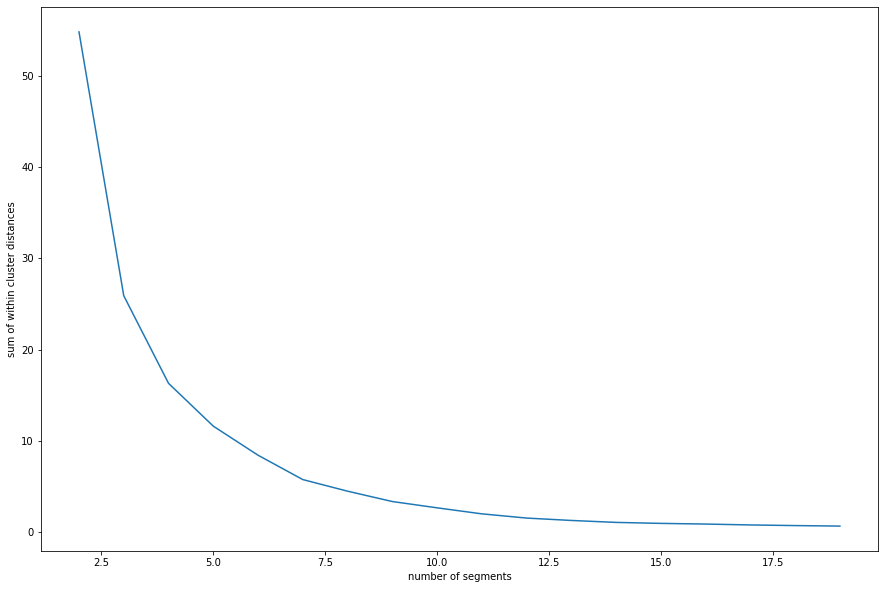

In [50]:
segments=np.arange(2,20)
cluster_dist=[]


for i in segments:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(dfw)
    cluster_dist.append((kmeans.inertia_))
    label = kmeans.labels_
    sil_coeff = silhouette_score(dfw, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(i, sil_coeff))

plt.figure(figsize=(15,10))
plt.plot(segments, cluster_dist)
plt.xlabel("number of segments")
plt.ylabel("sum of within cluster distances")

In [51]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(dfw)
df1['label'] = pd.Series(kmeans.labels_+1,index=df1.index)

In [52]:
prof3 = ProfileReport(df1)
prof3.to_file('profile3.html')

C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 9 5 0 3 7 5 5 5 7 5 5 9 7 1 1 9 1 0 7 0 5 7 3 5 7 0 3 7 0 5 0 5 0 1 1 1
 1 7 1 1 0 9 0 5 3 9 0 5 0 5 0 0 7 1 1 1 1 1 1 7 9 7 3 9 3 0 3 3 9 1 1 3 9
 0 0 3 7 3 7 3 7 7 1 9 3 7 9 0 9 1 1 0 9 3 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\Arvind\AppData\Roaming\Python\Python39\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profilin

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 0, 'Profession vs Segment')

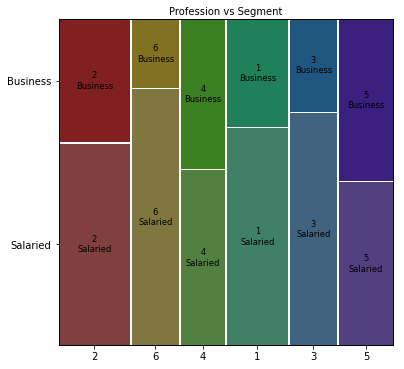

In [53]:
mosaic(df1,['label','Profession'])
plt.xlabel("Profession vs Segment")

Text(0.5, 0, 'Marital Status vs Segment')

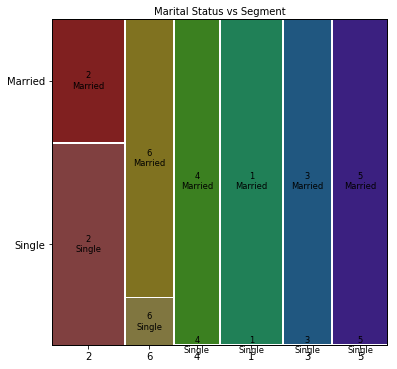

In [54]:
mosaic(df1,['label','Marrital Status'])
plt.xlabel("Marital Status vs Segment")

Text(0.5, 0, 'Education vs Segment')

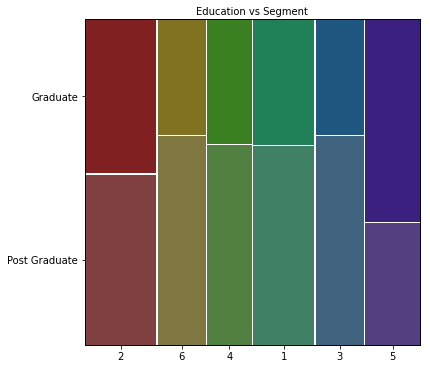

In [55]:
mosaic(df1,['label','Education'],labelizer=lambda k: " ")
plt.xlabel("Education vs Segment")

Text(0.5, 0, 'Dependent Count vs Segment')

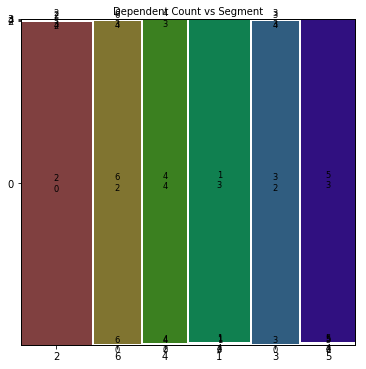

In [56]:
mosaic(df1,['label','No of Dependents'])
plt.xlabel("Dependent Count vs Segment")